<a href="https://colab.research.google.com/github/SusmitaChow/PythonProjectCRUD/blob/main/AI_in_Precision_Onco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
   Age  Tumor_Size  Biomarker_A  Biomarker_B  Previous_Treatment_Efficacy  \
0   41    1.552471     0.877671     0.357408                    98.982978   
1   30    3.485286     0.109389     0.950260                    72.454239   
2   44    7.028488     0.262300     0.925903                     0.424850   
3   71    1.302288     0.963892     0.150827                    20.948023   
4   59    1.603505     0.876250     0.571537                    22.994760   

    Response  
0  89.387561  
1  16.049769  
2  34.068050  
3  41.141630  
4  68.000697  

Basic statistics:
              Age  Tumor_Size  Biomarker_A  Biomarker_B  \
count  100.000000  100.000000   100.000000   100.000000   
mean    53.740000    5.194944     0.522596     0.514044   
std     14.672602    2.567749     0.282019     0.277826   
min     30.000000    1.056343     0.013183     0.052485   
25%     41.750000    2.948048     0.283928     0.265874   
50%     53.000000    5.102488     0.551299   

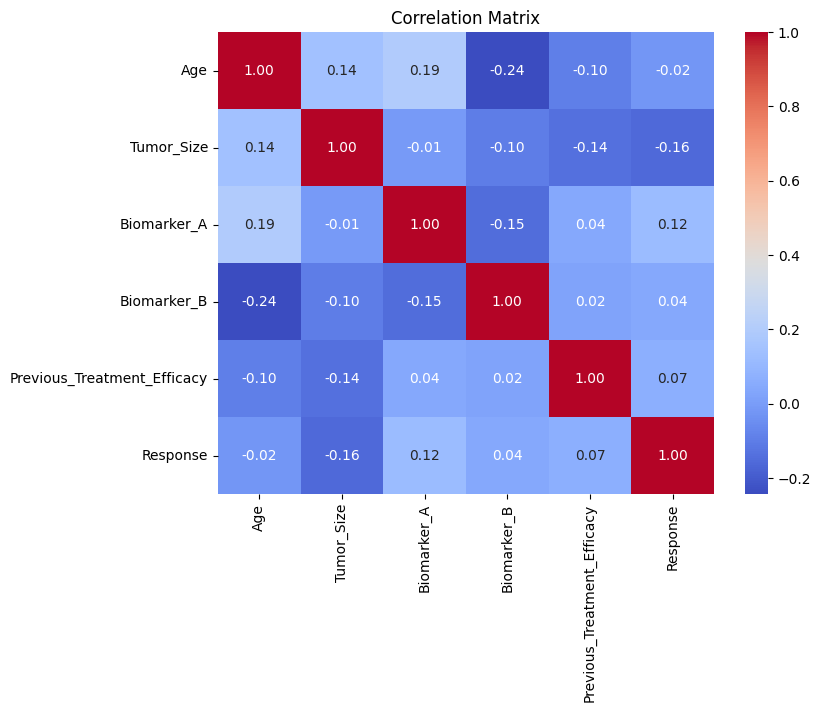

Mean Squared Error: 669.30
R-Squared: 0.07


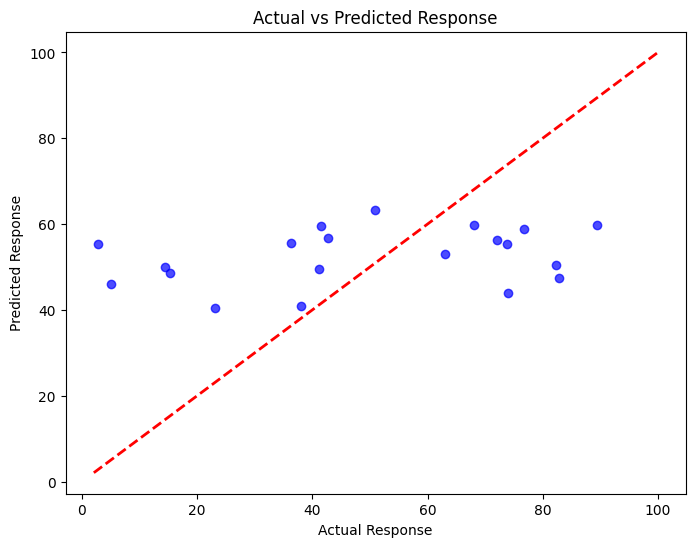

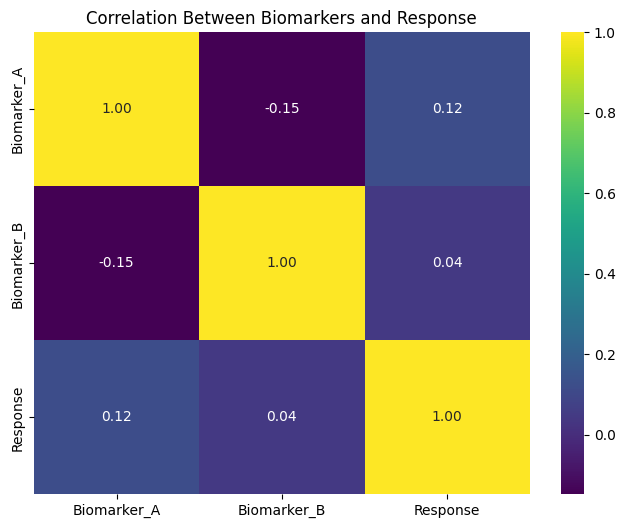

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Data Preparation (Simulated Dataset)
data = {
    "Age": np.random.randint(30, 80, 100),
    "Tumor_Size": np.random.uniform(1, 10, 100),
    "Biomarker_A": np.random.uniform(0, 1, 100),
    "Biomarker_B": np.random.uniform(0, 1, 100),
    "Previous_Treatment_Efficacy": np.random.uniform(0, 100, 100),
    "Response": np.random.uniform(0, 100, 100),  # Target variable
}

# Create DataFrame
df = pd.DataFrame(data)

# Step 2: Data Exploration
print("First 5 rows of the dataset:")
print(df.head())
print("\nBasic statistics:")
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Step 3: Splitting the Data
X = df[["Age", "Tumor_Size", "Biomarker_A", "Biomarker_B", "Previous_Treatment_Efficacy"]]
y = df["Response"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Building and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared: {r2:.2f}")

# Step 7: Visualization
# Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel("Actual Response")
plt.ylabel("Predicted Response")
plt.title("Actual vs Predicted Response")
plt.show()

# Additional Analysis: Heatmap for Biomarkers vs Treatment Success
biomarkers = df[["Biomarker_A", "Biomarker_B", "Response"]]
plt.figure(figsize=(8, 6))
sns.heatmap(biomarkers.corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Between Biomarkers and Response")
plt.show()
